In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Activation
from keras.datasets import mnist
from keras import backend as k
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
#Mendefinisikan LeNet Model
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        # Menentukan model yang akan digunakan
        model = Sequential()
        # Menambahkan Layers
        model.add(Conv2D(20, kernel_size=5, activation='relu', padding='same', input_shape=input_shape))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        model.add(Conv2D(50, kernel_size=5, border_mode='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        model.add(Flatten())
        model.add(Dense(500, activation='relu'))
        model.add(Dense(classes, activation='softmax'))
        return model

In [0]:
# Hyperparameter
BATCH_SIZE=128
EPOCHS = 50
IP_SHAPE = (1, 28, 28)
k.common.image_dim_ordering()
k.common.set_image_dim_ordering('th')

In [0]:
# Loading dan preprocessing dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)


11493376/11490434 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 3')

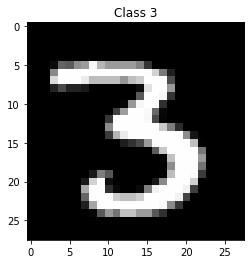

In [0]:
plt.imshow(X_train[12], cmap='gray')
plt.title('Class '+ str(y_train[12]))

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# Membuat Model
model = LeNet.build(input_shape=IP_SHAPE, classes=10)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=True, validation_split=0.25)
score=model.evaluate(X_test, y_test, verbose=True)
print("Test Score : ", score[0])
print("Test Accuracy : ", score[1])
print(history.history.keys())













Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, kernel_size=5, activation="relu", padding="same")`
  if __name__ == '__main__':




Train on 45000 samples, validate on 15000 samples
Epoch 1/50
45000/45000 [==============================] - 100s 2ms/step - loss: 0.1823 - acc: 0.9448 - val_loss: 0.0866 - val_acc: 0.9719
Epoch 2/50
45000/45000 [==============================] - 100s 2ms/step - loss: 0.0487 - acc: 0.9847 - val_loss: 0.0421 - val_acc: 0.9867
Epoch 3/50
45000/45000 [==============================] - 100s 2ms/step - loss: 0.0306 - acc: 0.9907 - val_loss: 0.0501 - val_acc: 0.9857
Epoch 4/50
45000/45000 [==============================] - 99s 2ms/step - loss: 0.0232 - acc: 0.9921 - val_loss: 0.0401 - val_acc: 0.9887
Epoch 5/50
45000/45000 [==============================] - 99s 2ms/step - loss: 0.0178 - acc: 0.9939 - val_loss: 0.0384 - val_acc: 0.9888
Epoch 6/50
45000/45000 [==============================] - 99s 2ms/step - loss: 0.0131 - acc: 0.9956 - val_loss: 0.0458 - val_acc: 0.9872
Epoch 7/50
45000/45000 [==============================] - 99s 2ms/step - loss: 0.0102 - acc: 0.9964 - val_loss: 0.0459 - va

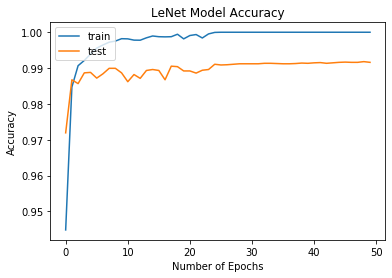

In [0]:
# Visualisasi Akurasi
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("LeNet Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()